In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df, movie_titles, on='item_id')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [12]:
df['user_id'].nunique()

944

In [13]:
df['item_id'].nunique()

1682

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [21]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [24]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [27]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [28]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [29]:
ratings['no. of ratings'] = df.groupby('title')['rating'].count()

In [30]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [42]:
import cufflinks as cf
cf.go_offline()

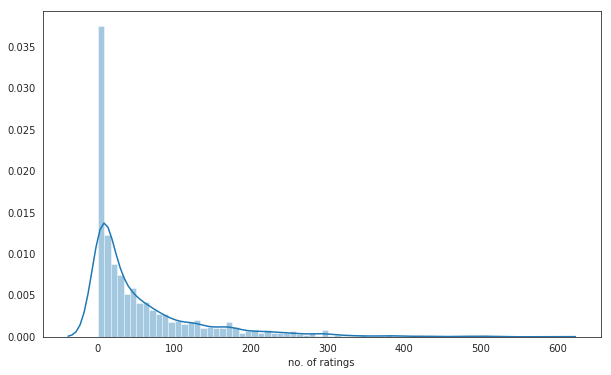

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(ratings['no. of ratings'], bins=70)

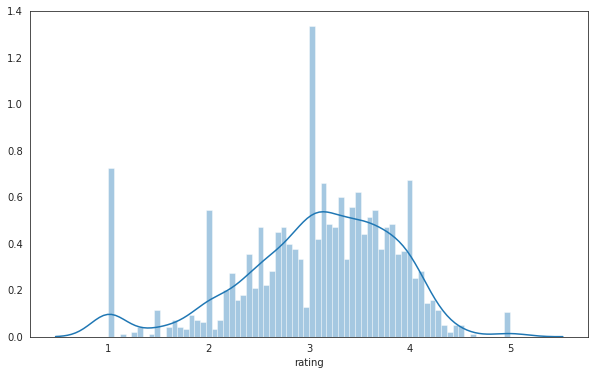

In [48]:
plt.figure(figsize=(10,6))
sns.distplot(ratings['rating'], bins=70)

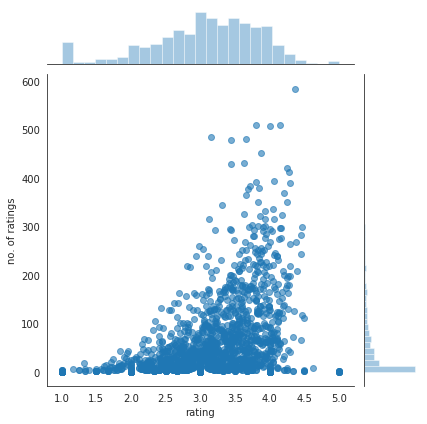

In [54]:
sns.jointplot(x='rating', y='no. of ratings', data=ratings, alpha=0.6)

In [56]:
moviemat = df.pivot_table(index = 'user_id', columns= 'title', values= 'rating')

In [57]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [60]:
ratings.sort_values('no. of ratings', ascending=False).head(10)

,rating,no. of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [62]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [63]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [64]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

/home/abhijeet/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/abhijeet/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning:

divide by zero encountered in true_divide



In [66]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [67]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/home/abhijeet/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/abhijeet/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning:

divide by zero encountered in true_divide



In [75]:
pd.isnull(similar_to_starwars).sum()

254

In [79]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [80]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [81]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [82]:
corr_starwars = corr_starwars.join(ratings['no. of ratings'])
corr_starwars.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [88]:
corr_starwars[corr_starwars['no. of ratings']>100].sort_values('Correlation', ascending=False).head(15)

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [93]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['Correlation'])

In [94]:
corr_liarliar.sort_values('Correlation', ascending=False).head()

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0


In [100]:
#corr_liarliar = corr_liarliar.join(ratings['no. of ratings'])
corr_liarliar.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.118913,9
1-900 (1994),NaN,5
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41


In [106]:
corr_liarliar.dropna(inplace=True)

In [110]:
corr_liarliar[corr_liarliar['no. of ratings'] > 120].sort_values('Correlation', ascending=False).head(15)

,Correlation,no. of ratings
title,,
Liar Liar (1997),1.000000,485
"Mask, The (1994)",0.484650,129
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
Indiana Jones and the Last Crusade (1989),0.414427,331
Top Gun (1986),0.405720,220
G.I. Jane (1997),0.397931,175
Multiplicity (1996),0.396860,134
Grumpier Old Men (1995),0.390699,148
